In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/My Drive/COMP4433/Take-home_Examination_1/"

/content/drive/My Drive/COMP4433/Take-home_Examination_1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_excel('SixHKStockData.xlsx')

In [5]:
i = 8
list_del_cols = []
list_del_cols.append(i)
while True:
  if (i+9 >= df.shape[1]):
    break
  elif ("Unnamed:" in df.iloc[:,i+9].name):
    i+=9
  else:
    i+=8
  list_del_cols.append(i)

In [6]:
df.drop(df.columns[list_del_cols], axis=1, inplace=True)

In [7]:
df = df[(df['tdate'].notna())]

In [8]:
i = 1
while True:
  if (i >= df.shape[1]):
    break
  if ("stock_id" in df.iloc[:,i].name):
    df.iloc[:,i] = int(df.iloc[:,i].mode()[0])
    df = df.rename(columns={df.iloc[:,i].name: ("stock_id: "+str(int(df.iloc[:,i].mode()[0])))})
    if i > 1:
      df.drop(df.columns[i+1], axis=1, inplace=True)
  i+=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [9]:
df.insert(df.columns.get_loc("Close-857"), "trend: "+str(int(df.iloc[:,df.columns.get_loc("stock_id: 857")].mode()[0])), np.nan)

In [10]:
for i in range(2,8):
  i_id = 1
  for j in range(i,df.shape[1],7):
    if i == 2:
      df = df.rename(columns={df.iloc[:,j].name: ("open: "+str(int(df.iloc[:,i_id].mode()[0])))})
    elif i == 3:
      df = df.rename(columns={df.iloc[:,j].name: ("trend: "+str(int(df.iloc[:,i_id].mode()[0])))})
    elif i == 4:
      df = df.rename(columns={df.iloc[:,j].name: ("close: "+str(int(df.iloc[:,i_id].mode()[0])))})
    elif i == 5:
      df = df.rename(columns={df.iloc[:,j].name: ("high: "+str(int(df.iloc[:,i_id].mode()[0])))})
    elif i == 6:
      df = df.rename(columns={df.iloc[:,j].name: ("low: "+str(int(df.iloc[:,i_id].mode()[0])))})
    elif i == 7:
      df = df.rename(columns={df.iloc[:,j].name: ("volume: "+str(int(df.iloc[:,i_id].mode()[0])))})
    i_id += 7

In [11]:
list_cols_nan_exist = []
for j in range(4,df.shape[1],7):
  col_name = df.iloc[:,j].name
  if df[col_name].iloc[1:].isnull().values.any():
    list_cols_nan_exist.append(df.iloc[:,j-1].name)

In [12]:
for i in range(3,df.shape[1],7):
  if df.iloc[:,i].name in list_cols_nan_exist:
    continue
  col_name_trend = df.iloc[:,i].name
  col_name_close = df.iloc[:,i+1].name
  for j in range(df.shape[0]-1):
    if df[col_name_close].iloc[j+1] - df[col_name_close].iloc[j] < 0:
      df[col_name_trend].iloc[j+1] = 'Down'
    if df[col_name_close].iloc[j+1] - df[col_name_close].iloc[j] > 0:
      df[col_name_trend].iloc[j+1] = 'Up'
    else:
      df[col_name_trend].iloc[j+1] = 'Level'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
df_reverse = df.iloc[::-1].copy()
df_pred = df_reverse.copy()

i = 0
while True:
  n = df_pred.shape[1]
  if i >= n:
    break
  if "tdate" in df_pred.iloc[:,i].name and i > 0: 
    df_pred = df_pred.drop([df_pred.iloc[:,i].name], axis=1)
  if "stock_id" in df_pred.iloc[:,i].name:
    df_pred = df_pred.drop([df_pred.iloc[:,i].name], axis=1)
  if "trend" in df_pred.iloc[:,i].name:
    df_pred = df_pred.drop([df_pred.iloc[:,i].name], axis=1)
  i += 1

In [14]:
df_pred = df_pred[[c for c in df_pred if c not in ['open: 857', 'close: 857', 'high: 857', 'low: 857', 'volume: 857']] + ['open: 857', 'close: 857', 'high: 857', 'low: 857', 'volume: 857']]

In [15]:
temp = df_pred[(df_pred['tdate'] < '2000-04-07')]
temp.iloc[:,temp.shape[1]-5:] = np.nan
df_pred[(df_pred['tdate'] < '2000-04-07')] = temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [16]:
cols_exist_empty = df_pred.loc[:, df_pred.isna().any()]
rows_colsExistEmpty_all_empty = df_pred[(cols_exist_empty.T == 0).any()]
rows_colsExistEmpty_all_empty

,tdate,open: 1,close: 1,high: 1,low: 1,volume: 1,open: 11,close: 11,high: 11,low: 11,volume: 11,open: 293,close: 293,high: 293,low: 293,volume: 293,open: 13,close: 13,high: 13,low: 13,volume: 13,open: 23,close: 23,high: 23,low: 23,volume: 23,open: 857,close: 857,high: 857,low: 857,volume: 857
1759,2006-10-02,83.65,83.65,83.65,83.65,0.0,98.45,98.45,98.45,98.45,0.0,16.00,16.00,16.00,16.00,0.0,68.75,68.75,68.75,68.75,0.0,35.40,35.40,35.40,35.40,0.0,8.37,8.37,8.37,8.37,0
1671,2006-05-31,84.10,84.10,84.10,84.10,0.0,97.30,97.30,97.30,97.30,0.0,12.75,12.75,12.75,12.75,0.0,70.65,70.65,70.65,70.65,0.0,29.55,29.55,29.55,29.55,0.0,8.35,8.35,8.35,8.35,0
1653,2006-05-05,88.65,88.65,88.65,88.65,0.0,101.00,101.00,101.00,101.00,0.0,13.60,13.60,13.60,13.60,0.0,77.35,77.35,77.35,77.35,0.0,32.70,32.70,32.70,32.70,0.0,9.25,9.25,9.25,9.25,0
1649,2006-05-01,87.40,87.40,87.40,87.40,0.0,100.30,100.30,100.30,100.30,0.0,13.90,13.90,13.90,13.90,0.0,76.30,76.30,76.30,76.30,0.0,32.40,32.40,32.40,32.40,0.0,8.55,8.55,8.55,8.55,0
1639,2006-04-17,83.50,83.50,83.50,83.50,0.0,100.30,100.30,100.30,100.30,0.0,13.75,13.75,13.75,13.75,0.0,72.70,72.70,72.70,72.70,0.0,31.25,31.25,31.25,31.25,0.0,8.5,8.50,8.5,8.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2000-05-10,79.75,79.25,80.75,78.50,5471200.0,67.50,66.25,67.50,66.00,1465800.0,13.80,14.00,14.10,13.70,4297400.0,101.00,99.75,101.00,99.25,11281000.0,15.90,15.05,15.90,14.95,4855000.0,1.16,1.16,1.16,1.16,0
90,2000-05-09,83.25,83.25,83.25,83.25,0.0,67.25,67.25,67.25,67.25,0.0,14.50,14.50,14.50,14.50,0.0,103.50,103.50,103.50,103.50,0.0,16.10,16.10,16.10,16.10,0.0,1.16,1.16,1.16,1.16,0
84,2000-05-01,93.00,93.00,93.00,93.00,0.0,72.00,72.00,72.00,72.00,0.0,13.85,13.85,13.85,13.85,0.0,113.00,113.00,113.00,113.00,0.0,16.85,16.85,16.85,16.85,0.0,1.21,1.21,1.21,1.21,0
79,2000-04-24,87.00,87.00,87.00,87.00,0.0,70.50,70.50,70.50,70.50,0.0,13.90,13.90,13.90,13.90,0.0,110.00,110.00,110.00,110.00,0.0,17.40,17.40,17.40,17.40,0.0,1.18,1.18,1.18,1.18,0


In [17]:
for i in range(5,df_pred.shape[1],5):
  for j in range(df_pred.shape[0]):
    if df_pred.iloc[j,i] == 0:
      j_copy_down = j-1
      j_copy_up = j+1
      count = 1
      sum = 0
      while j_copy_down >= 0 and j_copy_up <= df_pred.shape[0]-1:
        if (df_pred.iloc[j_copy_down,i] > 0 and df_pred.iloc[j_copy_up,i] > 0):
          sum += (df_pred.iloc[j_copy_down,i] + df_pred.iloc[j_copy_up,i])
          count+=1
        j_copy_down-=1
        j_copy_up+=1
      df_pred.iloc[j,i] = round(sum/((count-1)*2))

In [18]:
cols_exist_empty = df_pred.loc[:, df_pred.isna().any()]
rows_colsExistEmpty_all_empty = df_pred[(cols_exist_empty.T == 0).any()]
rows_colsExistEmpty_all_empty

,tdate,open: 1,close: 1,high: 1,low: 1,volume: 1,open: 11,close: 11,high: 11,low: 11,volume: 11,open: 293,close: 293,high: 293,low: 293,volume: 293,open: 13,close: 13,high: 13,low: 13,volume: 13,open: 23,close: 23,high: 23,low: 23,volume: 23,open: 857,close: 857,high: 857,low: 857,volume: 857


In [19]:
df_pred_train = df_pred[(df_pred['tdate'] >= '2000-04-07')]
df_pred_test = df_pred[(df_pred['tdate'] < '2000-04-07')]

Predict 'open: 857'

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
sc_X = MinMaxScaler(feature_range=(0,1))
X_train = sc_X.fit_transform(df_pred_train.iloc[:,1:-5].values)
X_test = sc_X.transform(df_pred_test.iloc[:,1:-5].values)

In [22]:
sc_y = MinMaxScaler(feature_range=(0,1))
y_train = df_pred_train.loc[:,'open: 857'].values.reshape(-1,1)
y_train = sc_y.fit_transform(y_train)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [24]:
dict_best_hyperparams = {}
cv = 5

In [25]:
def rmsle_score(preds, true):
    rmsle_score = (np.sum((np.log1p(preds)-np.log1p(true))**2)/len(true))**0.5
    return rmsle_score

In [26]:
# Support Vector Regressor

from sklearn.svm import SVR
regressor_SVR = SVR()

# define search
parameters = [{'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}]
search_SVR = GridSearchCV(regressor_SVR, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_SVR.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_SVR).__name__] =  result.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.14549478        nan        nan 0.13624765 0.14074901 0.20588245
 0.14972853 0.19732144 0.16282078 0.17809378 0.19931639 0.18589235
 0.14260386        nan        nan 0.12103398 0.1208067         nan
 0.13053352 0.1834483  0.13664747 0.14923414 0.19920186 0.16283738
 0.14239085        nan        nan 0.11118417        nan        nan
 0.12073422 0.15734118 0.11748457 0.13014022 0.19898513 0.13650379
 0.14239085        nan        nan 0.18446035        nan        nan
 0.11423504 0.1407604  0.13967383 0.11451168 0.19732144 0.11640188]
  category=UserWarning,


In [27]:
# Neural Network Regressor

from sklearn.neural_network import MLPRegressor
regressor_MLPRegressor = MLPRegressor()

# define search
parameters = [{'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive']
         }]
search_MLPRegressor = GridSearchCV(regressor_MLPRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_MLPRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_MLPRegressor).__name__] =  result.best_params_

In [28]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
regressor_DecisionTreeRegressor = DecisionTreeRegressor()

# define search
parameters=[{"splitter":["best","random"],
            "max_depth" : [5, 7, 11, 13],
            "min_samples_leaf":[3, 5, 7, 9],
            "min_weight_fraction_leaf":[0, 0.25, 0.5],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[20, 60, 80, 100] }]
search_DecisionTreeRegressor = GridSearchCV(regressor_DecisionTreeRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_DecisionTreeRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_DecisionTreeRegressor).__name__] =  result.best_params_

In [29]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
regressor_RandomForestRegressor = RandomForestRegressor()

# define search
parameters=[{'bootstrap': [True, False],
            'max_depth': [5, 7, 11],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [3, 5, 7],
            'min_samples_split': [4, 8],
            'n_estimators': [25, 50] }]
search_RandomForestRegressor = GridSearchCV(regressor_RandomForestRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_RandomForestRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_RandomForestRegressor).__name__] =  result.best_params_

In [30]:
# K-Nearest Neighbour Regressor

from sklearn.neighbors import KNeighborsRegressor
regressor_KNeighborsRegressor = KNeighborsRegressor()

# define search
parameters = [{'weights': ['uniform', 'distance'], 
               'n_neighbors': [20, 60, 100]}]
search_KNeighborsRegressor = GridSearchCV(regressor_KNeighborsRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_KNeighborsRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_KNeighborsRegressor).__name__] =  result.best_params_

In [31]:
# Gaussian Process Regressor

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct
regressor_GaussianProcessRegressor = GaussianProcessRegressor()

# define search
parameters = [{
    "alpha":  [1e-2, 1e-3],
    "kernel": [RBF(l) for l in np.logspace(-1, 1, 2)]
}, {
    "alpha":  [1e-2, 1e-3],
    "kernel": [DotProduct(sigma_0) for sigma_0 in np.logspace(-1, 1, 2)]
}]
search_GaussianProcessRegressor = GridSearchCV(regressor_GaussianProcessRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_GaussianProcessRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_GaussianProcessRegressor).__name__] =  result.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.1315448  0.1315448         nan        nan 0.10073505 0.10073506
 0.10157239 0.10159767]
  category=UserWarning,


In [32]:
# XGBoost Regressor

from xgboost import XGBRegressor
regressor_XGBRegressor = XGBRegressor()

# define search
parameters = [ {"max_depth": [max_depth for max_depth in range(9,12)],
                "min_child_weight": [min_child_weight for min_child_weight in range(5,8)], 
                "objective": ['reg:squarederror'] 
 } ]
search_XGBRegressor = GridSearchCV(regressor_XGBRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_XGBRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_XGBRegressor).__name__] =  result.best_params_

In [33]:
for keys in dict_best_hyperparams.keys():
    dict_best_hyperparams[keys] = str(dict_best_hyperparams[keys])

In [34]:
dict_best_hyperparams

{'DecisionTreeRegressor': "{'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 100, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.25, 'splitter': 'random'}",
 'GaussianProcessRegressor': "{'alpha': 0.01, 'kernel': RBF(length_scale=0.1)}",
 'KNeighborsRegressor': "{'n_neighbors': 100, 'weights': 'uniform'}",
 'MLPRegressor': "{'activation': 'logistic', 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'solver': 'sgd'}",
 'RandomForestRegressor': "{'bootstrap': False, 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 25}",
 'SVR': "{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",
 'XGBRegressor': "{'max_depth': 11, 'min_child_weight': 5, 'objective': 'reg:squarederror'}"}

In [35]:
# 

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
dict_plot_rmsle = {}
dict_plot_std = {}

In [38]:
def get_cv_scores_rmsle(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train.ravel(),
                             scoring=make_scorer(rmsle_score),
                             cv=cv)
    
    # print('CV Mean: ', np.mean(scores))
    dict_plot_rmsle[type(model).__name__] = np.mean(scores)
    # print('STD: ', np.std(scores))
    dict_plot_std[type(model).__name__] = np.std(scores)
    # print('\n')

In [39]:
regressor_SVR = SVR(C=0.1, gamma=0.1, kernel= 'sigmoid').fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_SVR)

In [40]:
regressor_MLPRegressor = MLPRegressor(activation='logistic', hidden_layer_sizes=(50, 75, 100), learning_rate= 'constant', solver= 'sgd').fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_MLPRegressor)

In [41]:
regressor_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=13, max_features='sqrt', max_leaf_nodes=60, min_samples_leaf=3, min_weight_fraction_leaf=0.25, splitter='random').fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_DecisionTreeRegressor)

In [42]:
regressor_RandomForestRegressor = RandomForestRegressor(bootstrap=False, max_depth=5, max_features='auto', min_samples_leaf=3, min_samples_split=8, n_estimators=50).fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_RandomForestRegressor)

In [43]:
regressor_KNeighborsRegressor = KNeighborsRegressor(n_neighbors=100, weights='uniform').fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_KNeighborsRegressor)

In [44]:
regressor_GaussianProcessRegressor = GaussianProcessRegressor(alpha=0.01, kernel=RBF(length_scale=0.1)).fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_GaussianProcessRegressor)

In [45]:
regressor_XGBRegressor = XGBRegressor(max_depth=11, min_child_weight=5, objective='reg:squarederror').fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_XGBRegressor)

In [46]:
pd_model_performance = pd.DataFrame({'rmsle_score':pd.Series(dict_plot_rmsle),'Standard_Deviation':pd.Series(dict_plot_std)}).sort_values(by=['rmsle_score', 'Standard_Deviation'])

In [47]:
pd_model_performance

,rmsle_score,Standard_Deviation
XGBRegressor,0.097721,0.053736
KNeighborsRegressor,0.108997,0.073404
RandomForestRegressor,0.115158,0.063305
GaussianProcessRegressor,0.131545,0.094872
SVR,0.205882,0.061490
DecisionTreeRegressor,0.205895,0.073504
MLPRegressor,0.220610,0.100150


In [48]:
# 

In [49]:
y_pred = sc_y.inverse_transform(regressor_XGBRegressor.predict(X_test).reshape(-1,1))

In [50]:
df_pred

,tdate,open: 1,close: 1,high: 1,low: 1,volume: 1,open: 11,close: 11,high: 11,low: 11,volume: 11,open: 293,close: 293,high: 293,low: 293,volume: 293,open: 13,close: 13,high: 13,low: 13,volume: 13,open: 23,close: 23,high: 23,low: 23,volume: 23,open: 857,close: 857,high: 857,low: 857,volume: 857
1855,2007-02-21,101.7,100.60,102.2,100.60,3346800.0,113.20,112.90,113.40,112.90,3835300.0,21.40,21.40,21.65,21.10,3419100.0,79.7,79.60,80.10,79.50,8711300.0,48.00,47.80,48.00,47.45,1484700.0,9.5,9.53,9.54,9.45,80589700
1854,2007-02-16,102.5,101.50,102.2,100.20,5131800.0,111.30,112.90,113.20,112.00,5721000.0,21.55,21.40,21.75,21.20,2069400.0,79.5,79.55,79.95,79.40,7159100.0,47.65,48.00,48.00,47.25,2976400.0,9.58,9.55,9.59,9.47,51442400
1853,2007-02-15,102.6,102.50,103.8,101.30,4995800.0,110.80,111.40,112.70,110.40,12138300.0,21.85,21.50,21.85,21.40,3049900.0,79.9,79.45,80.15,79.10,14636600.0,47.25,47.50,47.80,47.20,3434400.0,9.67,9.57,9.67,9.54,60270500
1852,2007-02-14,102.8,101.30,103.1,100.50,4035000.0,108.00,108.90,111.40,107.40,8256100.0,21.50,21.40,21.80,21.30,2873000.0,80.7,79.20,80.70,78.95,12538400.0,47.65,47.15,47.90,47.00,3407600.0,9.6,9.50,9.6,9.44,73609100
1851,2007-02-13,105.7,101.10,105.7,101.10,6394500.0,108.80,106.70,108.80,106.40,6213700.0,21.80,21.35,21.95,21.15,4187900.0,81.6,79.30,81.60,78.90,16629600.0,47.95,47.20,47.95,46.15,4683100.0,9.55,9.48,9.56,9.44,100870800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2000-01-10,91.5,89.25,93.0,89.25,3713200.0,84.00,80.75,84.50,80.25,2107400.0,13.80,14.30,14.50,13.70,8515300.0,108.0,106.00,110.00,106.00,4829400.0,19.80,20.40,21.00,19.80,6140700.0,NaN,NaN,NaN,NaN,NaN
3,2000-01-07,88.0,88.50,89.0,86.50,4323800.0,78.00,81.50,81.75,78.00,3248900.0,13.10,13.50,13.65,13.10,13400000.0,103.0,103.00,107.00,101.00,5993200.0,18.60,19.45,19.50,18.60,3662800.0,NaN,NaN,NaN,NaN,NaN
2,2000-01-06,92.0,86.75,92.5,85.00,7462000.0,82.50,76.75,82.50,75.25,5992700.0,12.40,12.95,13.15,12.20,9866800.0,109.0,102.00,109.00,100.00,7979000.0,19.50,18.40,20.00,18.00,6480000.0,NaN,NaN,NaN,NaN,NaN
1,2000-01-05,93.5,91.25,95.0,90.75,4330100.0,84.00,81.75,86.50,81.25,3586200.0,12.95,12.30,13.30,12.00,8835300.0,108.0,107.00,111.50,105.00,7655600.0,20.30,19.50,20.50,19.00,5232900.0,NaN,NaN,NaN,NaN,NaN


In [51]:
temp = df_pred[(df_pred['tdate'] < '2000-04-07')]
temp.loc[:,'open: 857'] = np.round(y_pred,2)
df_pred[(df_pred['tdate'] < '2000-04-07')] = temp

df_pred_train = df_pred[(df_pred['tdate'] >= '2000-04-07')]
df_pred_test = df_pred[(df_pred['tdate'] < '2000-04-07')]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Predict 'close: 857'

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
sc_X = MinMaxScaler(feature_range=(0,1))
X_train = sc_X.fit_transform(df_pred_train.iloc[:,1:-4].values)
X_test = sc_X.transform(df_pred_test.iloc[:,1:-4].values)

In [54]:
sc_y = MinMaxScaler(feature_range=(0,1))
y_train = df_pred_train.loc[:,'close: 857'].values.reshape(-1,1)
y_train = sc_y.fit_transform(y_train)

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [56]:
dict_best_hyperparams = {}
cv = 5

In [57]:
# Support Vector Regressor

from sklearn.svm import SVR
regressor_SVR = SVR()

# define search
parameters = [{'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}]
search_SVR = GridSearchCV(regressor_SVR, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_SVR.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_SVR).__name__] =  result.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.12921317 0.18919104        nan 0.09564656 0.0828427  0.16349914
 0.13060665 0.19786184 0.1436337  0.17202294 0.19984929 0.18186059
 0.12885086 0.15737109        nan 0.0849902  0.07812438        nan
 0.08167421 0.1775918  0.09403235 0.12945499 0.19990878 0.14365419
 0.12885086 0.15332046        nan 0.0847922  0.12015737        nan
 0.07148747 0.14015636 0.06963627 0.07958881 0.19969114 0.0942243
 0.12885086 0.15332046        nan 0.0847922  0.18924259        nan
 0.06941085 0.08290111 0.06358138 0.06899361 0.19786184 0.0700483 ]
  category=UserWarning,


In [58]:
# Neural Network Regressor

from sklearn.neural_network import MLPRegressor
regressor_MLPRegressor = MLPRegressor()

# define search
parameters = [{'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive']
         }]
search_MLPRegressor = GridSearchCV(regressor_MLPRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_MLPRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_MLPRegressor).__name__] =  result.best_params_

In [59]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
regressor_DecisionTreeRegressor = DecisionTreeRegressor()

# define search
parameters=[{"splitter":["best","random"],
            "max_depth" : [5, 7, 11, 13],
            "min_samples_leaf":[3, 5, 7, 9],
            "min_weight_fraction_leaf":[0, 0.25, 0.5],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[20, 60, 80, 100] }]
search_DecisionTreeRegressor = GridSearchCV(regressor_DecisionTreeRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_DecisionTreeRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_DecisionTreeRegressor).__name__] =  result.best_params_

In [60]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
regressor_RandomForestRegressor = RandomForestRegressor()

# define search
parameters=[{'bootstrap': [True, False],
            'max_depth': [5, 7, 11],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [3, 5, 7],
            'min_samples_split': [4, 8],
            'n_estimators': [25, 50] }]
search_RandomForestRegressor = GridSearchCV(regressor_RandomForestRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_RandomForestRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_RandomForestRegressor).__name__] =  result.best_params_

In [61]:
# K-Nearest Neighbour Regressor

from sklearn.neighbors import KNeighborsRegressor
regressor_KNeighborsRegressor = KNeighborsRegressor()

# define search
parameters = [{'weights': ['uniform', 'distance'], 
               'n_neighbors': [20, 60, 100]}]
search_KNeighborsRegressor = GridSearchCV(regressor_KNeighborsRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_KNeighborsRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_KNeighborsRegressor).__name__] =  result.best_params_

In [62]:
# Gaussian Process Regressor

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct
regressor_GaussianProcessRegressor = GaussianProcessRegressor()

# define search
parameters = [{
    "alpha":  [1e-2, 1e-3],
    "kernel": [RBF(l) for l in np.logspace(-1, 1, 2)]
}, {
    "alpha":  [1e-2, 1e-3],
    "kernel": [DotProduct(sigma_0) for sigma_0 in np.logspace(-1, 1, 2)]
}]
search_GaussianProcessRegressor = GridSearchCV(regressor_GaussianProcessRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_GaussianProcessRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_GaussianProcessRegressor).__name__] =  result.best_params_

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [63]:
# XGBoost Regressor

from xgboost import XGBRegressor
regressor_XGBRegressor = XGBRegressor()

# define search
parameters = [ {"max_depth": [max_depth for max_depth in range(9,12)],
                "min_child_weight": [min_child_weight for min_child_weight in range(5,8)], 
                "objective": ['reg:squarederror'] 
 } ]
search_XGBRegressor = GridSearchCV(regressor_XGBRegressor, param_grid = parameters, scoring=make_scorer(rmsle_score), n_jobs=-1, cv=cv)
result = search_XGBRegressor.fit(X_train, y_train.ravel())
# summarize result
# print('Best Hyperparameters: %s' % result.best_params_)
dict_best_hyperparams[type(regressor_XGBRegressor).__name__] =  result.best_params_

In [64]:
for keys in dict_best_hyperparams.keys():
    dict_best_hyperparams[keys] = str(dict_best_hyperparams[keys])

In [65]:
dict_best_hyperparams

{'DecisionTreeRegressor': "{'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 100, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.25, 'splitter': 'random'}",
 'GaussianProcessRegressor': "{'alpha': 0.01, 'kernel': RBF(length_scale=10)}",
 'KNeighborsRegressor': "{'n_neighbors': 100, 'weights': 'uniform'}",
 'MLPRegressor': "{'activation': 'logistic', 'hidden_layer_sizes': (50, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}",
 'RandomForestRegressor': "{'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 4, 'n_estimators': 25}",
 'SVR': "{'C': 1, 'gamma': 0.001, 'kernel': 'poly'}",
 'XGBRegressor': "{'max_depth': 10, 'min_child_weight': 5, 'objective': 'reg:squarederror'}"}

In [66]:
# 

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
dict_plot_rmsle = {}
dict_plot_std = {}

In [69]:
def get_cv_scores_rmsle(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train.ravel(),
                             scoring=make_scorer(rmsle_score),
                             cv=cv)
    
    # print('CV Mean: ', np.mean(scores))
    dict_plot_rmsle[type(model).__name__] = np.mean(scores)
    # print('STD: ', np.std(scores))
    dict_plot_std[type(model).__name__] = np.std(scores)
    # print('\n')

In [70]:
regressor_SVR = SVR(C= 1, gamma= 0.001, kernel= 'poly').fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_SVR)

In [71]:
regressor_MLPRegressor = MLPRegressor(activation='logistic', hidden_layer_sizes=(50, 100), learning_rate= 'constant', solver= 'sgd').fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_MLPRegressor)

In [72]:
regressor_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=13, max_features='log2', max_leaf_nodes=80, min_samples_leaf=5, min_weight_fraction_leaf=0.25, splitter='random').fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_DecisionTreeRegressor)

In [73]:
regressor_RandomForestRegressor = RandomForestRegressor(bootstrap=False, max_depth=7, max_features='sqrt', min_samples_leaf=5, min_samples_split=4, n_estimators=25).fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_RandomForestRegressor)

In [74]:
regressor_KNeighborsRegressor = KNeighborsRegressor(n_neighbors=100, weights='uniform').fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_KNeighborsRegressor)

In [75]:
regressor_GaussianProcessRegressor = GaussianProcessRegressor(alpha=0.01, kernel=RBF(length_scale=10)).fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_GaussianProcessRegressor)

In [76]:
regressor_XGBRegressor = XGBRegressor(max_depth=10, min_child_weight=5, objective='reg:squarederror').fit(X_train, y_train.ravel())
get_cv_scores_rmsle(regressor_XGBRegressor)

In [77]:
pd_model_performance = pd.DataFrame({'rmsle_score':pd.Series(dict_plot_rmsle),'Standard_Deviation':pd.Series(dict_plot_std)}).sort_values(by=['rmsle_score', 'Standard_Deviation'])

In [78]:
pd_model_performance

,rmsle_score,Standard_Deviation
GaussianProcessRegressor,0.008464,0.005146
XGBRegressor,0.030429,0.038576
RandomForestRegressor,0.081463,0.054031
KNeighborsRegressor,0.092839,0.062418
DecisionTreeRegressor,0.197886,0.112145
SVR,0.199909,0.106413
MLPRegressor,0.223727,0.097372


In [79]:
# 

In [80]:
y_pred = sc_y.inverse_transform(regressor_GaussianProcessRegressor.predict(X_test).reshape(-1,1))

In [81]:
temp = df_pred[(df_pred['tdate'] < '2000-04-07')]
temp.loc[:,'close: 857'] = np.round(y_pred,2)
df_pred[(df_pred['tdate'] < '2000-04-07')] = temp

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [82]:
df_pred

,tdate,open: 1,close: 1,high: 1,low: 1,volume: 1,open: 11,close: 11,high: 11,low: 11,volume: 11,open: 293,close: 293,high: 293,low: 293,volume: 293,open: 13,close: 13,high: 13,low: 13,volume: 13,open: 23,close: 23,high: 23,low: 23,volume: 23,open: 857,close: 857,high: 857,low: 857,volume: 857
1855,2007-02-21,101.7,100.60,102.2,100.60,3346800.0,113.20,112.90,113.40,112.90,3835300.0,21.40,21.40,21.65,21.10,3419100.0,79.7,79.60,80.10,79.50,8711300.0,48.00,47.80,48.00,47.45,1484700.0,9.5,9.53,9.54,9.45,80589700
1854,2007-02-16,102.5,101.50,102.2,100.20,5131800.0,111.30,112.90,113.20,112.00,5721000.0,21.55,21.40,21.75,21.20,2069400.0,79.5,79.55,79.95,79.40,7159100.0,47.65,48.00,48.00,47.25,2976400.0,9.58,9.55,9.59,9.47,51442400
1853,2007-02-15,102.6,102.50,103.8,101.30,4995800.0,110.80,111.40,112.70,110.40,12138300.0,21.85,21.50,21.85,21.40,3049900.0,79.9,79.45,80.15,79.10,14636600.0,47.25,47.50,47.80,47.20,3434400.0,9.67,9.57,9.67,9.54,60270500
1852,2007-02-14,102.8,101.30,103.1,100.50,4035000.0,108.00,108.90,111.40,107.40,8256100.0,21.50,21.40,21.80,21.30,2873000.0,80.7,79.20,80.70,78.95,12538400.0,47.65,47.15,47.90,47.00,3407600.0,9.6,9.50,9.6,9.44,73609100
1851,2007-02-13,105.7,101.10,105.7,101.10,6394500.0,108.80,106.70,108.80,106.40,6213700.0,21.80,21.35,21.95,21.15,4187900.0,81.6,79.30,81.60,78.90,16629600.0,47.95,47.20,47.95,46.15,4683100.0,9.55,9.48,9.56,9.44,100870800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2000-01-10,91.5,89.25,93.0,89.25,3713200.0,84.00,80.75,84.50,80.25,2107400.0,13.80,14.30,14.50,13.70,8515300.0,108.0,106.00,110.00,106.00,4829400.0,19.80,20.40,21.00,19.80,6140700.0,1.5,1.51,NaN,NaN,NaN
3,2000-01-07,88.0,88.50,89.0,86.50,4323800.0,78.00,81.50,81.75,78.00,3248900.0,13.10,13.50,13.65,13.10,13400000.0,103.0,103.00,107.00,101.00,5993200.0,18.60,19.45,19.50,18.60,3662800.0,1.62,1.64,NaN,NaN,NaN
2,2000-01-06,92.0,86.75,92.5,85.00,7462000.0,82.50,76.75,82.50,75.25,5992700.0,12.40,12.95,13.15,12.20,9866800.0,109.0,102.00,109.00,100.00,7979000.0,19.50,18.40,20.00,18.00,6480000.0,1.64,1.55,NaN,NaN,NaN
1,2000-01-05,93.5,91.25,95.0,90.75,4330100.0,84.00,81.75,86.50,81.25,3586200.0,12.95,12.30,13.30,12.00,8835300.0,108.0,107.00,111.50,105.00,7655600.0,20.30,19.50,20.50,19.00,5232900.0,1.58,1.54,NaN,NaN,NaN


In [83]:
# 

In [84]:
stock_open_1 = 0
stock_close_1 = 0
movements_1 = 0

stock_open_11 = 0
stock_close_11 = 0
movements_11 = 0

stock_open_293 = 0
stock_close_293 = 0
movements_293 = 0

stock_open_13 = 0
stock_close_13 = 0
movements_13 = 0

stock_open_23 = 0
stock_close_23 = 0
movements_23 = 0

stock_open_857 = 0
stock_close_857 = 0
movements_857 = 0

for i in range(1,df_pred.shape[1],5):
  if "1" in df_pred.iloc[:,i].name:
    stock_open_1 = np.array(df_pred.iloc[:,i]).T
    stock_close_1 = np.array(df_pred.iloc[:,i+1]).T
    movements_1 = stock_close_1 - stock_open_1
  if "11" in df_pred.iloc[:,i].name:
    stock_open_11 = np.array(df_pred.iloc[:,i]).T
    stock_close_11 = np.array(df_pred.iloc[:,i+1]).T
    movements_11 = stock_close_11 - stock_open_11
  if "293" in df_pred.iloc[:,i].name:
    stock_open_293 = np.array(df_pred.iloc[:,i]).T
    stock_close_293 = np.array(df_pred.iloc[:,i+1]).T
    movements_293 = stock_close_293 - stock_open_293
  if "13" in df_pred.iloc[:,i].name:
    stock_open_13 = np.array(df_pred.iloc[:,i]).T
    stock_close_13 = np.array(df_pred.iloc[:,i+1]).T
    movements_13 = stock_close_13 - stock_open_13
  if "23" in df_pred.iloc[:,i].name:
    stock_open_23 = np.array(df_pred.iloc[:,i]).T
    stock_close_23 = np.array(df_pred.iloc[:,i+1]).T
    movements_23 = stock_close_23 - stock_open_23
  if "857" in df_pred.iloc[:,i].name:
    stock_open_857 = np.array(df_pred.iloc[:,i]).T
    stock_close_857 = np.array(df_pred.iloc[:,i+1]).T
    movements_857 = stock_close_857 - stock_open_857

In [85]:
d = {'1': movements_1,
     '11': movements_11, 
     '293': movements_293,
     '13': movements_13, 
     '23': movements_23,
     '857': movements_857}
movements = np.concatenate(([movements_1,movements_11,movements_293],[movements_13,movements_23,movements_857]),axis=0)

In [86]:
movements_1

array([-0.1 ,  0.05, -0.45, ..., -7.  , -1.  , -0.5 ])

In [87]:
# np.append(movements_1,movements_11, axis=0)

In [88]:
movements

array([[-0.10000000000000853, 0.04999999999999716, -0.45000000000000284,
        ..., -7.0, -1.0, -0.5],
       [-0.29999999999999716, 1.6000000000000085, 0.6000000000000085,
        ..., -5.75, -2.25, -0.25],
       [0.0, -0.15000000000000213, -0.3500000000000014, ...,
        0.5499999999999989, -0.6499999999999986, -0.20000000000000107],
       [-0.10000000000000853, 0.04999999999999716, -0.45000000000000284,
        ..., -7.0, -1.0, -0.5],
       [-0.20000000000000284, 0.3500000000000014, 0.25, ...,
        -1.1000000000000014, -0.8000000000000007, -0.5500000000000007],
       [0.02999999999999936, -0.02999999999999936, -0.09999999999999964,
        ..., -0.08999998569488521, -0.0400000429153442,
        0.03000004768371589]], dtype=object)

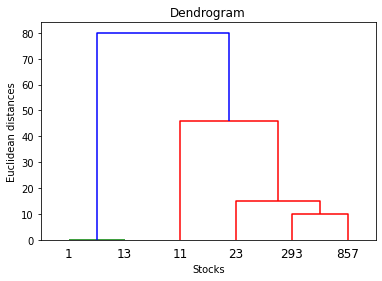

In [89]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(movements, method = 'ward'), labels=list(d.keys()))
plt.title('Dendrogram')
plt.xlabel('Stocks')
plt.ylabel('Euclidean distances')
plt.show()

In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sc = MinMaxScaler(feature_range=(0,1))
reduced_data = PCA(n_components = 2)
kmeans = KMeans(n_clusters = 2, max_iter = 1000)

pipeline = make_pipeline(sc,reduced_data,kmeans)

pipeline.fit(movements)
labels = pipeline.predict(movements)

In [96]:
df_clusters = pd.DataFrame({'labels':labels,'stocks':list(d.keys())}).sort_values(by=['labels'],axis = 0)

In [97]:
df_clusters

,labels,stocks
1,0,11
2,0,293
4,0,23
5,0,857
0,1,1
3,1,13


<Figure size 432x288 with 0 Axes>

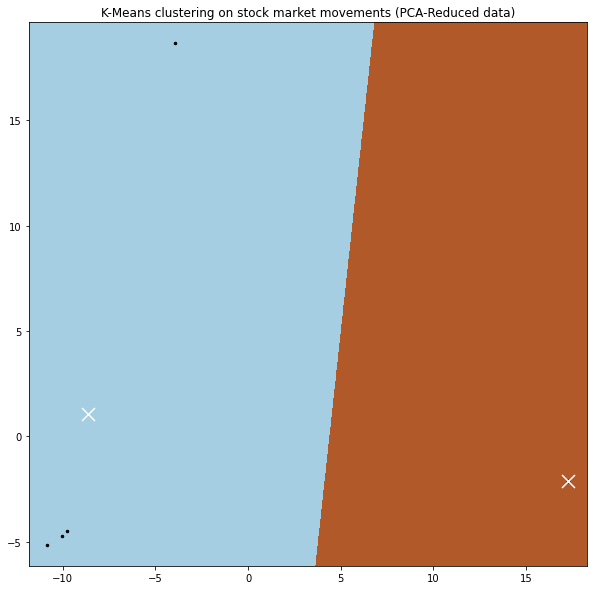

In [98]:
sc = MinMaxScaler(feature_range=(0,1))
norm_movements = sc.fit_transform(movements)
# Reduce the data
reduced_data = PCA(n_components = 0.95).fit_transform(norm_movements)

# Define step size of mesh
h = 0.01

# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using the trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,
           interpolation = 'nearest',
           extent=(xx.min(),
                   xx.max(),
                   yy.min(),
                   yy.max()),
           cmap = cmap,
           aspect = 'auto',
           origin = 'lower')

plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)

plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

# Each black point represents a stock. Each white cross represents the centroid of respective cluster.